# Parse Trajectory Information

In [1]:
import urllib.request,json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
print ("Packages loaded.")

Packages loaded.


### Parse json 

In [2]:
MODE = 2
if MODE == 1:
    # From link
    page_link = 'http://sparklingmesh.iptime.org:10000/api/v1/position/list?id=1' # small data
    with urllib.request.urlopen(page_link) as url:
        s = url.read()
        json_parsed = json.loads(s)
    traj = json_parsed['data']
    L = len(traj)
    print ("L:[%d]"%(L))
elif MODE == 2:
    # From file
    file_path = '1620.json'
    f = open(file_path,)
    json_parsed = json.load(f)
    traj = json_parsed['data']
    L = len(traj)
    print ("L:[%d]"%(L))   

L:[1620]


### Parse time-stamped trajectory

In [3]:
xy_traj = np.zeros(shape=(L,2))
times = np.zeros(shape=(L))
for tick in range(L):
    p_t = traj[tick]
    x,y,sec_org = p_t['rX'],p_t['rY'],p_t['timestamp']/1000
    if tick == 0:
        sec_init = sec_org
    sec = sec_org - sec_init
    xy_traj[tick,0],xy_traj[tick,1],times[tick] = x,y,sec
    print ("tick:[%d] sec:[%.2f] xy:(%.2f,%.2f)"%(tick,sec,x,y)) # print

tick:[0] sec:[0.00] xy:(18.44,29.95)
tick:[1] sec:[2.02] xy:(18.51,30.02)
tick:[2] sec:[9.09] xy:(19.34,30.17)
tick:[3] sec:[11.08] xy:(19.34,30.17)
tick:[4] sec:[13.09] xy:(18.44,29.72)
tick:[5] sec:[14.12] xy:(18.21,29.72)
tick:[6] sec:[105.82] xy:(18.24,29.81)
tick:[7] sec:[110.86] xy:(18.24,29.81)
tick:[8] sec:[111.86] xy:(18.24,29.81)
tick:[9] sec:[113.87] xy:(18.24,29.81)
tick:[10] sec:[115.91] xy:(18.24,29.81)
tick:[11] sec:[117.91] xy:(18.92,30.49)
tick:[12] sec:[118.92] xy:(18.92,30.94)
tick:[13] sec:[119.94] xy:(18.05,29.71)
tick:[14] sec:[125.98] xy:(18.05,29.71)
tick:[15] sec:[128.00] xy:(18.05,29.71)
tick:[16] sec:[129.00] xy:(18.05,29.71)
tick:[17] sec:[131.00] xy:(18.05,29.71)
tick:[18] sec:[132.03] xy:(18.05,29.71)
tick:[19] sec:[134.04] xy:(18.05,29.71)
tick:[20] sec:[136.08] xy:(17.88,29.93)
tick:[21] sec:[142.12] xy:(17.88,30.61)
tick:[22] sec:[144.14] xy:(18.10,29.71)
tick:[23] sec:[146.17] xy:(19.23,30.83)
tick:[24] sec:[147.18] xy:(19.23,30.83)
tick:[25] sec:[149.

tick:[1468] sec:[4965.98] xy:(18.33,30.53)
tick:[1469] sec:[4968.98] xy:(18.33,30.76)
tick:[1470] sec:[4970.99] xy:(18.55,30.83)
tick:[1471] sec:[4972.01] xy:(18.40,30.88)
tick:[1472] sec:[4974.01] xy:(19.53,32.00)
tick:[1473] sec:[4975.01] xy:(19.31,32.11)
tick:[1474] sec:[4977.05] xy:(19.76,32.06)
tick:[1475] sec:[4980.06] xy:(20.21,31.61)
tick:[1476] sec:[4981.06] xy:(19.98,31.16)
tick:[1477] sec:[4982.09] xy:(19.08,30.71)
tick:[1478] sec:[4983.09] xy:(19.76,30.94)
tick:[1479] sec:[4984.09] xy:(19.08,31.39)
tick:[1480] sec:[4985.11] xy:(20.63,31.81)
tick:[1481] sec:[4986.13] xy:(19.85,31.03)
tick:[1482] sec:[4987.12] xy:(18.54,30.17)
tick:[1483] sec:[4988.14] xy:(18.68,30.31)
tick:[1484] sec:[4989.14] xy:(18.81,30.44)
tick:[1485] sec:[4990.14] xy:(18.95,30.58)
tick:[1486] sec:[4991.16] xy:(18.60,30.90)
tick:[1487] sec:[4992.16] xy:(18.57,30.87)
tick:[1488] sec:[4993.16] xy:(18.50,30.79)
tick:[1489] sec:[4994.16] xy:(18.63,30.93)
tick:[1490] sec:[4995.17] xy:(18.71,31.00)
tick:[1491]

### Plot trajectory

In [4]:
import matplotlib.collections as mcoll
import matplotlib.path as mpath
def colorline(
    x, y, z=None, cmap=plt.get_cmap('jet'), norm=plt.Normalize(0.0, 1.0),
        linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """
    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))
    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])
    z = np.asarray(z)
    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)
    ax = plt.gca()
    ax.add_collection(lc)
    return lc
def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments
print ("Done.")

Done.


### Plot trajectory

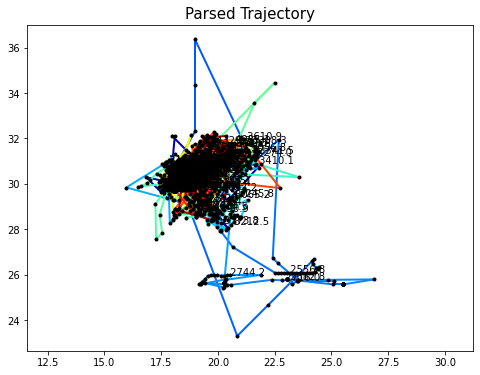

In [5]:
plt.figure(figsize=(8,6))
plt.plot(xy_traj[:,0],xy_traj[:,1],'ko',markersize=3)
colorline(xy_traj[:,0],xy_traj[:,1],np.linspace(0,1,L),linewidth=2)
for tick in range(L):
    if (tick%20) == 0:
        plt.text(xy_traj[tick,0],xy_traj[tick,1],
                 ' %.1f'%times[tick],fontsize=10)
plt.title('Parsed Trajectory',fontsize=15)
plt.axis('equal')
plt.show()

### Make heatmap

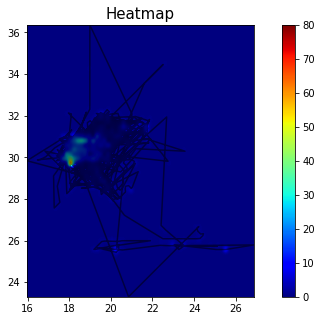

In [6]:
from matplotlib import cm
heatmap,xedges,yedges = np.histogram2d(xy_traj[:,0],xy_traj[:,1], bins=(60,60))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.figure(figsize=(10,5))
plt.plot(xy_traj[:,0],xy_traj[:,1],'k-',alpha=0.5)
plt.imshow(heatmap.T,extent=extent,origin='lower',cmap=cm.jet,
          interpolation='gaussian')
plt.colorbar()
plt.title('Heatmap',fontsize=15)
plt.show()

### Kalman Filter

In [7]:
class KalmanFilterClass(object):
    def __init__(self,name='kf',dt=0.05,q_x=0.1,q_v=0.1,r_y=1.0,y_init=0.0):
        self.name = name
        self.dt = dt
        self.q_x = q_x
        self.q_v = q_v
        self.r_y = r_y
        self.y_init = y_init
        # Initialize some internal variables
        self.Q = np.array([[self.q_x,0],[0,self.q_v]])
        self.R = np.array(self.r_y)
        self.H = np.array([[1,0]])
        self.F = np.array([[1,self.dt],[0,1]])
        #
        self.x_hat = np.array([[self.y_init],[0]])
        self.P_hat = self.Q
        self.y = self.y_init
        
    # Update Kalman Filter
    def update(self,y):
        x_hat_m = np.matmul(self.F,self.x_hat)
        P_hat_m = np.matmul(np.matmul(self.F,self.P_hat),self.F.T) + self.Q
        W = np.linalg.inv(np.matmul(np.matmul(self.H,P_hat_m),self.H.T)+self.R)
        K = np.matmul(np.matmul(P_hat_m, self.H.T),W)
        # Update
        self.x_hat = self.x_hat + np.matmul(K,y-np.matmul(self.H,x_hat_m))
        self.P_hat = P_hat_m - np.matmul(np.matmul(K,self.H),P_hat_m)
print ("Done.")

Done.


In [8]:
DO_KF = False
# Kalman filtering 
if DO_KF: # optional
    dt,q_x,q_v,r_y = 0.25,1.0,0.5,2.0
    K_x = KalmanFilterClass(
        name='x',dt=dt,q_x=q_x,q_v=q_v,r_y=r_y,y_init=xy_traj[tick,0])
    K_y = KalmanFilterClass(
        name='y',dt=dt,q_x=q_x,q_v=q_v,r_y=r_y,y_init=xy_traj[tick,1])
    xy_traj_filtered = np.zeros(shape=(L,2))
    for tick in range(L):
        # Kalman filter
        K_x.update(y=xy_traj[tick,0])
        K_y.update(y=xy_traj[tick,1])
        # Use predicted position
        x_filtered = K_x.x_hat[0] + K_x.x_hat[1]*K_x.dt
        y_filtered = K_y.x_hat[0] + K_y.x_hat[1]*K_y.dt
        xy_traj_filtered[tick,0],xy_traj_filtered[tick,1] = x_filtered,y_filtered
    print ("Filtered")

    # - Plot - 
    plt.figure(figsize=(8,6))
    plt.plot(xy_traj[:,0],xy_traj[:,1],'ko-')
    plt.plot(xy_traj_filtered[:,0],xy_traj_filtered[:,1],'b-')
    plt.axis('equal')
    plt.title('Parsed Trajectory',fontsize=15)
    plt.show()

### Smooth trajectory using Gaussian Random Path

In [9]:
HZ = len(times)/(times[-1]-times[0])
print ("N:[%d] time:[%.1f]~[%.1f] HZ:[%d]"%
       (len(times),times[0],times[-1],HZ))

N:[1620] time:[0.0]~[5258.5] HZ:[0]


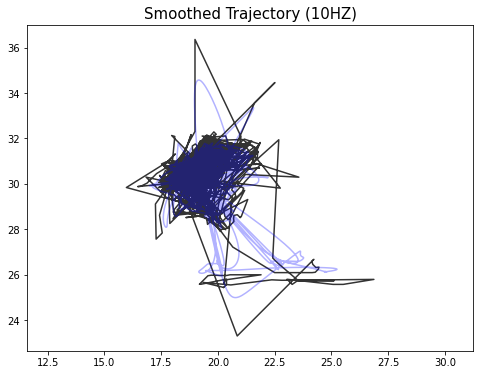

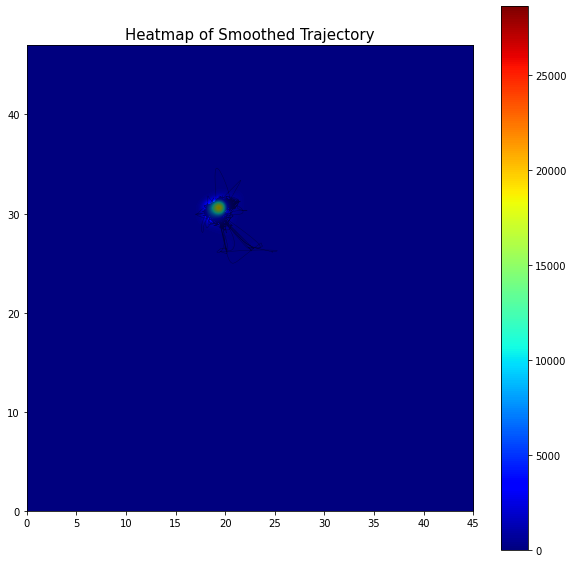

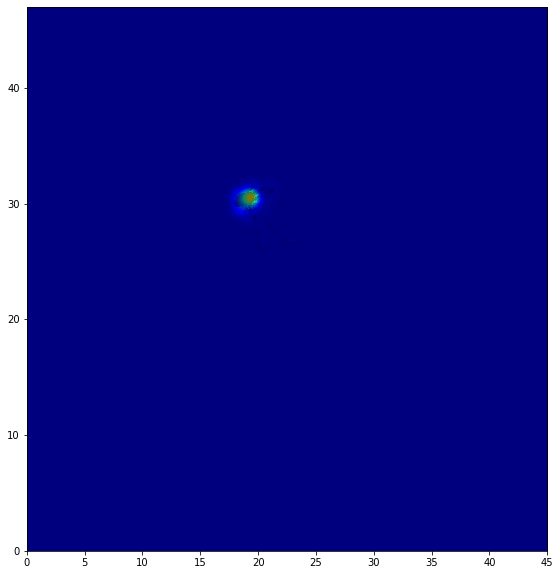

In [20]:
from scipy.spatial.distance import pdist, squareform, cdist

def kernel_se(t1,t2,hyp={'gain':1,'len':1,'noise':1e-8}):
    hyp_gain = float(hyp['gain'])**2
    hyp_len  = float(hyp['len'])
    if len(t1.shape)<=1: t1=t1.reshape((-1,1))
    if len(t2.shape)<=1: t2=t2.reshape((-1,1))
    D = cdist(t1,t2,'euclidean')
    K = hyp_gain*np.exp(-D**2 / (hyp_len**2))
    if t1.shape[0] == t2.shape[0]:
        K = K + hyp['noise']*np.eye(t1.shape[0])
    return K

def grp_mu(t_in,x_in,t_test,hyp):
    k_test_in = kernel_se(t_test,t_in,hyp=hyp)
    K_in_in = kernel_se(t_in,t_in,hyp=hyp) # n_data x n_data
    x_in_mean = x_in.mean(axis=0)
    mu_test = np.matmul(
        k_test_in,
        np.linalg.solve(K_in_in,x_in-x_in_mean))+x_in_mean
    return mu_test

# Smooth using GRP
t_start,t_final,HZ = np.min(times),np.max(times),10
t_test = np.linspace(start=t_start,stop=t_final,num=round(t_final-t_start)*HZ)
hyp = {'gain':1,'len':2,'noise':5e-1} # hyperparameter
xy_smoothed = np.zeros(shape=(t_test.shape[0],2))
xy_smoothed[:,0] = grp_mu(times,xy_traj[:,0],t_test,hyp)
xy_smoothed[:,1] = grp_mu(times,xy_traj[:,1],t_test,hyp)

# Plot the original and smoothed trajectory
plt.figure(figsize=(8,6))
plt.plot(xy_traj[:,0],xy_traj[:,1],'k-',alpha=0.8)
plt.plot(xy_smoothed[:,0],xy_smoothed[:,1],'b-',alpha=0.3)
plt.axis('equal')
plt.title('Smoothed Trajectory (%dHZ)'%(HZ),fontsize=15)
plt.show()

# Plot heatmap
heatmap,xedges,yedges = np.histogram2d(xy_smoothed[:,0],xy_smoothed[:,1],bins=(50,50),
                                      range=[[0, 45], [0, 47]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.figure(figsize=(10,10))
plt.plot(xy_smoothed[:,0],xy_smoothed[:,1],'k-',alpha=0.5,lw=0.4)
plt.imshow(heatmap.T,extent=extent,origin='lower',cmap=cm.jet,
          interpolation='gaussian')
plt.colorbar(); 
plt.title('Heatmap of Smoothed Trajectory',fontsize=15); plt.show()

# Another heatmap without colorbar
plt.figure(figsize=(10,10))
plt.plot(xy_smoothed[:,0],xy_smoothed[:,1],'k-',alpha=0.5,lw=0.1)
plt.imshow(heatmap.T,extent=extent,origin='lower',cmap=cm.jet,interpolation='gaussian')
plt.xlim(left=None,right=45)
plt.ylim(bottom=None,top=47)
# plt.axis('off') # to remove axis
plt.show()

### Make features

==== Booth visit frequency feature ====
	Booth[0]	Booth[1]	Booth[2]	Booth[3]	Booth[4]	
<1.0m 	 0.00    	 0.00    	 0.00    	 0.00    	 0.00    	
<2.0m 	 0.00    	 0.00    	 0.00    	 0.00    	 0.00    	
<3.0m 	 0.00    	 0.00    	 0.00    	 0.00    	 0.00    	
<4.0m 	 0.00    	 0.00    	 0.00    	 0.00    	 0.00    	


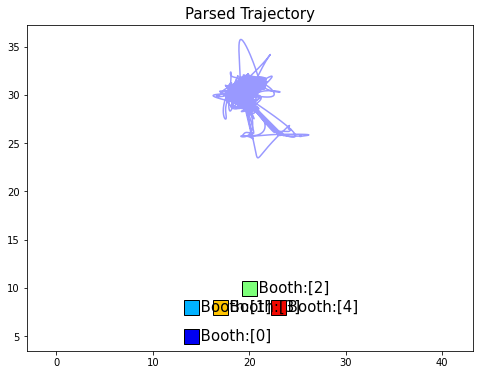

In [11]:
np.set_printoptions(precision=2)
# Set booth locations
booth_xys = np.array([[14,5],[14,8],[20,10],[17,8],[23,8]])

# Distance thresholds
d_ths = [1,2,3,4]

# Feature representation
n_booth = booth_xys.shape[0] # number of booths
n_th = len(d_ths) # number of thresholds
feature = np.zeros(shape=(n_booth,n_th)) # feature


# Loop
L_smoothed = xy_smoothed.shape[0]
for tick in range(L_smoothed): # for all ticks
    xy_t = xy_smoothed[tick] 
    for b_idx in range(n_booth): # for all booths 
        booth_xy_b = booth_xys[b_idx]
        dist_b = np.linalg.norm(xy_t-booth_xy_b) # distance to booth
        for d_idx in range(n_th): # for different distance thresholds
            d_th = d_ths[d_idx]
            if dist_b < d_th:
                feature[b_idx,d_idx] = feature[b_idx,d_idx] + 1
        VERBOSE = False
        if VERBOSE:
            print ("tick:[%d] b_idx:[%d] xy_t:%s booth_xy:%s dist_b:[%.2f]"%
                   (tick,b_idx,xy_t,booth_xy_b,dist_b))
# Normalize
feature = feature / L_smoothed

# Printout feature information
print ("==== Booth visit frequency feature ====")
print ("\t",end= '')
for b_idx in range(n_booth):
    print ("Booth[%d]\t"%(b_idx),end= '')
print ("")
for d_idx in range(n_th):    
    d_th = d_ths[d_idx]
    print ("<%.1fm \t"%(d_th),end= '')
    for b_idx in range(n_booth):
        freq = feature[b_idx,d_idx]
        print (" %.2f    \t"%(freq),end= '')
    print ("") 
    
# Plot trajectory with booths
plt.figure(figsize=(8,6))
colors = plt.cm.jet(np.linspace(0.1,0.9,n_booth))
for b_idx in range(n_booth):
    color = colors[b_idx]
    plt.plot(booth_xys[b_idx,0],booth_xys[b_idx,1],marker='s',
             color='k',mfc=color,ms=15,lw=5)
    plt.text(booth_xys[b_idx,0],booth_xys[b_idx,1],
             '  Booth:[%d]'%(b_idx),fontsize=15,va='center')
# plt.plot(xy_traj_filtered[:,0],xy_traj_filtered[:,1],'k-',alpha=0.1)
plt.plot(xy_smoothed[:,0],xy_smoothed[:,1],'b-',alpha=0.4)
plt.axis('equal')
plt.title('Parsed Trajectory',fontsize=15)
plt.show()